In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras




# Load dataset

In [3]:
img_array = np.load('')
label_array = np.load('').astype('float64')


# Split Test and Test

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(img_array, label_array, test_size=0.2, random_state=7)

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=7, )



# Model

In [33]:
from keras import layers

num_classes = 10


In [79]:
#EfficientNetV2B1, MobileNet, DenseNet121

base_model = keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224,3))

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=predictions)

29097984/29084464 [==============================] - 1s 0us/step


# Train Model

In [80]:
epochs = 10
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(
    train_x, train_y, epochs=epochs, callbacks=callbacks, validation_data=(val_x, val_y))


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


35/35 [==============================] - 53s 1s/step - loss: 0.5536 - accuracy: 0.8275 - val_loss: 5.0843 - val_accuracy: 0.4071
Epoch 2/10
35/35 [==============================] - 29s 819ms/step - loss: 0.1817 - accuracy: 0.9455 - val_loss: 9.3526 - val_accuracy: 0.3357
Epoch 3/10
35/35 [==============================] - 29s 818ms/step - loss: 0.1235 - accuracy: 0.9607 - val_loss: 5.2605 - val_accuracy: 0.5536
Epoch 4/10
35/35 [==============================] - 29s 820ms/step - loss: 0.0635 - accuracy: 0.9768 - val_loss: 2.3167 - val_accuracy: 0.6607
Epoch 5/10
35/35 [==============================] - 29s 819ms/step - loss: 0.0479 - accuracy: 0.9848 - val_loss: 9.1338 - val_accuracy: 0.2071
Epoch 6/10
35/35 [==============================] - 29s 820ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 12.4352 - val_accuracy: 0.2536
Epoch 7/10
35/35 [==============================] - 29s 819ms/step - loss: 0.0501 - accuracy: 0.9857 - val_loss: 0.9912 - val_accuracy: 0.8821
Epoch 8/10
3

# Test

In [83]:
pred = model.predict(test_x)
pred = np.argmax(pred, axis=1)



In [84]:
from sklearn.metrics import accuracy_score

score= accuracy_score(test_y, pred)
print(score)



0.8371428571428572


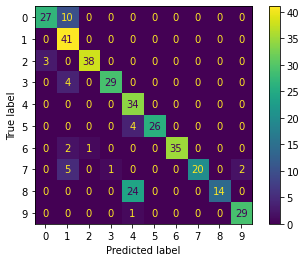

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)

disp_cm.plot()
plt.show()

